## Example: Visualizing Seattle Bicycle Counts

In [2]:
import pandas as pd

data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [8]:
data = data.drop(columns=['Fremont Bridge Total'])

In [9]:
data

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-11-01 00:00:00,7.0,5.0
2019-11-01 01:00:00,0.0,7.0
2019-11-01 02:00:00,0.0,1.0
2019-11-01 03:00:00,6.0,0.0
2019-11-01 04:00:00,5.0,1.0
...,...,...
2021-05-31 19:00:00,62.0,85.0
2021-05-31 20:00:00,44.0,39.0
2021-05-31 21:00:00,21.0,35.0


In [12]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [13]:
data.dropna().describe()

,West,East,Total
count,142144.000000,142144.000000,142144.000000
mean,50.571280,60.530075,111.101355
std,65.360139,88.136627,141.791650
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,30.000000,60.000000
75%,68.000000,74.000000,145.000000
max,698.000000,850.000000,1097.000000


#### Visualizing the Data

Text(0, 0.5, 'Hourly Bicycle Count')

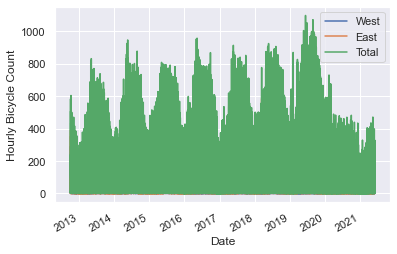

In [18]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

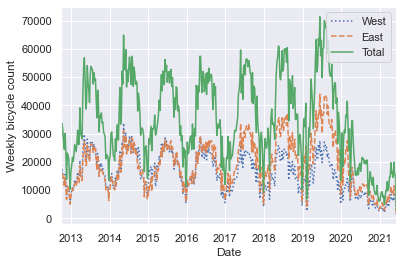

In [19]:
# Resampling data to a coarser grid
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

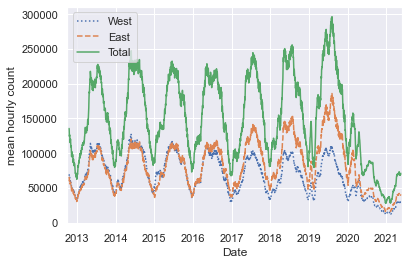

In [20]:
# 30-day rolling mean
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

<AxesSubplot:xlabel='Date'>

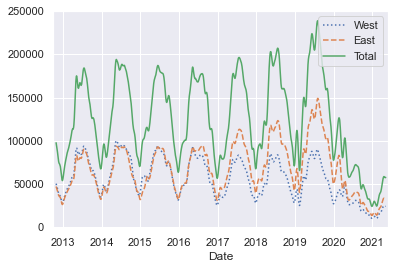

In [21]:
# Smoothing the rolling mean by using a window function
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

#### Digging into the data

<AxesSubplot:xlabel='time'>

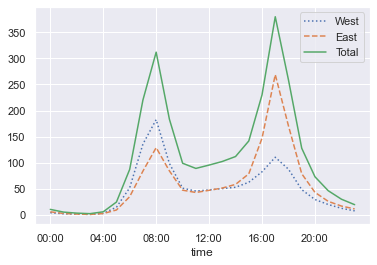

In [23]:
import numpy as np
# Average traffic as a function of the time of the day
# Grouping by data using time function and mean of values
by_time = data.groupby(data.index.time).mean()
# Ticks corresponding to epoch
hourly_ticks = 4 * 60 * 60 * np.arange(6)
# Plotting the data for the given times
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

<AxesSubplot:>

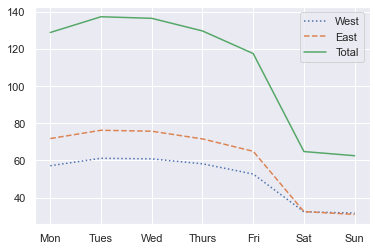

In [25]:
# Plotting changes by day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [26]:
# Hourly trend on weekdays versus weekends
# Differentiating weekdays from weekends
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

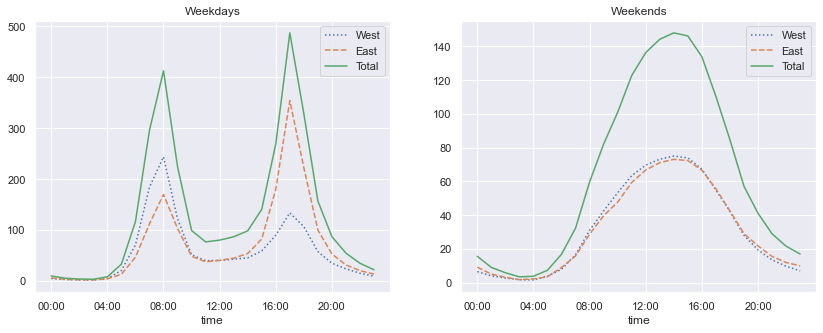

In [30]:
# ix is deprecated, so we'll use loc
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])

In [31]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])